### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Import the Folders - Train, Test & Validation

In [2]:
train = tf.keras.utils.image_dataset_from_directory('Fruits_Vegetables/train',
                                                   shuffle=True,
                                                   image_size=(180,180),
                                                   batch_size=32,
                                                   validation_split=False)

Found 3115 files belonging to 36 classes.


In [3]:
cat = train.class_names # categories
print(cat)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [4]:
test = tf.keras.utils.image_dataset_from_directory('Fruits_Vegetables/test',
                                                   shuffle=False,
                                                   image_size=(180,180),
                                                   batch_size=32,
                                                   validation_split=False)

Found 359 files belonging to 36 classes.


In [5]:
val = tf.keras.utils.image_dataset_from_directory('Fruits_Vegetables/validation',
                                                   shuffle=False,
                                                   image_size=(180,180),
                                                   batch_size=32,
                                                   validation_split=False)

Found 351 files belonging to 36 classes.


### Visualization

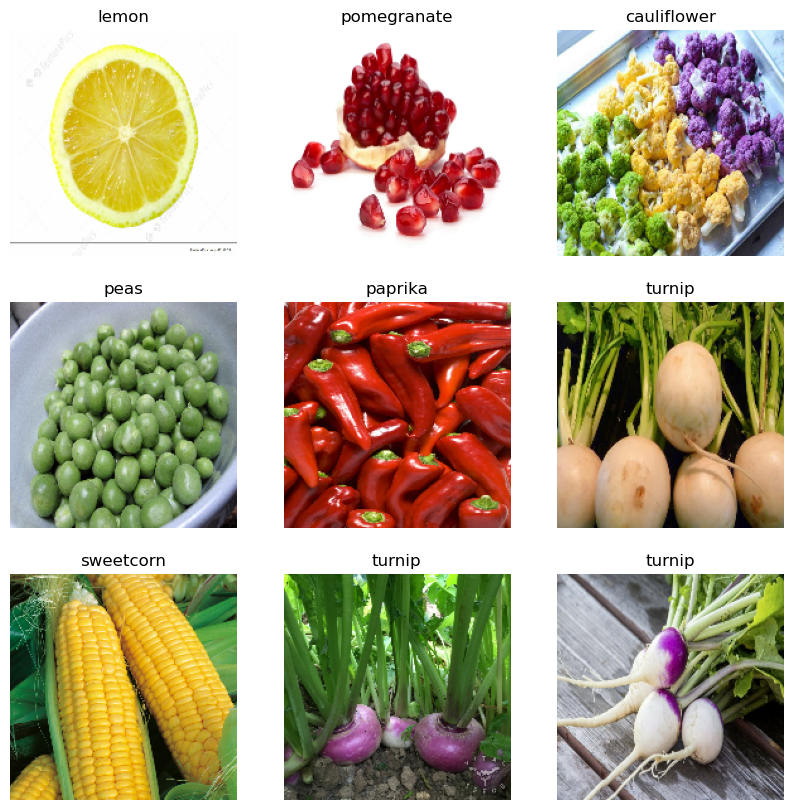

In [6]:
plt.figure(figsize=(10,10))
for image, labels in train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8')) # unknown int
        plt.title(cat[labels[i]])
        plt.axis('off')

## Model

In [7]:
model = Sequential([            # All images are in the form of RGB (Red,Green,Blue)
    layers.Rescaling(1/255),    # 255 combinations for each color
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units= len(cat))
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(train, validation_data=val, epochs=25)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 528ms/step - accuracy: 0.0661 - loss: 3.6739 - val_accuracy: 0.3362 - val_loss: 2.3601
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 457ms/step - accuracy: 0.3045 - loss: 2.4985 - val_accuracy: 0.5726 - val_loss: 1.6107
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 466ms/step - accuracy: 0.4320 - loss: 1.9438 - val_accuracy: 0.7721 - val_loss: 1.0186
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 467ms/step - accuracy: 0.6206 - loss: 1.3264 - val_accuracy: 0.8405 - val_loss: 0.6638
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 480ms/step - accuracy: 0.7670 - loss: 0.8132 - val_accuracy: 0.8974 - val_loss: 0.4887
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 466ms/step - accuracy: 0.8763 - loss: 0.4451 - val_accuracy: 0.9202 - val_loss: 0.3747
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 462ms/step - accuracy: 0.9273 - loss: 0.2621 - val_accuracy: 0.9288 - val_loss: 0.3580
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 473ms/step - accuracy: 0.9549 - loss: 0.1842 - val_accu

### Visualizing the Accuracy over Iterations

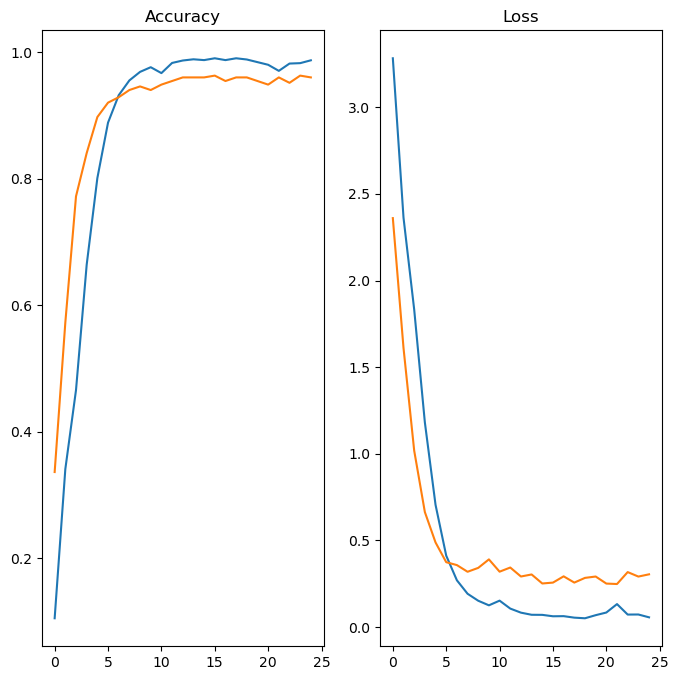

In [10]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(25), history.history['accuracy'],label='Training Accuracy')
plt.plot(range(25), history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(range(25), history.history['loss'],label='Training Loss')
plt.plot(range(25), history.history['val_loss'],label='Validation Loss')
plt.title('Loss')
plt.show()

### Prediction

In [11]:
image = tf.keras.utils.load_img('Corn.jpg',target_size=(180,180))
ima_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(ima_arr,0)

In [12]:
pred = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


In [13]:
score = tf.nn.softmax(pred)

In [14]:
print('Veg/Fruit in image is {} with accuracy of {:1.2F}'.format(cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 95.23


In [15]:
model.save('Image_classification_model.keras')